In [30]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import sys
import coffea.util as util
import time
import json
import os
import copy
from hist import Hist
sys.path.append("../../analysisTools/")
import plotTools as ptools
import utils
import mplhep as hep
import utils
hep.style.use("CMS")
plt.rcParams['font.size'] = 16.0
from matplotlib.colors import Normalize, LogNorm
from copy import deepcopy
from tqdm import tqdm
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib import colormaps
cmap_sig = list(colormaps['tab10'].colors) + list(colormaps['Dark2'].colors)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
hcs = ptools.histContainer("skimmed_signal_histos_VR_cuts_VR_vtx_v8.coffea")
hcb = ptools.histContainer("skimmed_bkg_histos_VR_cuts_VR_vtx_v8.coffea",bkg=True)
dfs = utils.get_dict_fromCutflow(hcs.load('cutflow'))
dfs['legend'] = dfs.apply(ptools.make_label,axis=1)
selected_signals = ["sig_2018_Mchi-10p5_dMchi-1p0_ctau-1",
                    "sig_2018_Mchi-52p5_dMchi-5p0_ctau-10",
                    "sig_2018_Mchi-22p0_dMchi-4p0_ctau-1",
                    "sig_2018_Mchi-44p0_dMchi-8p0_ctau-100"]
selected_labels = [dfs[dfs.name==s].legend.item() for s in selected_signals]

# Cutflow

In [36]:
cfs = hcs.load('cutflow_cts')
cfb = hcb.load('cutflow_cts')
cutDesc = hcs.load('cutDesc')
cuts,descs = [],[]
for c,d in cutDesc.items():
    if c == "cut7":
        continue
    cuts.append(c)
    descs.append(d)
from matplotlib import colormaps
cmap = list(colormaps['tab10'].colors) + list(colormaps['Dark2'].colors)
descs = ['Presel','GoodVtx','nJets > 2','b-veto',r'$|\eta_{j_0}| < 2.4$',
         r'$p_{T,j_0} > 80$',r"$\Delta\phi_\text{MET}^{j_0} > 2$",
         r"$\min\Delta\phi_\text{MET}^{j} > 0.75$",r"$M_{e^+e^-} > 0.1$",r"$|\Delta\phi(p_T^\mathrm{miss},p_T^{ee})| > 0.5$"]

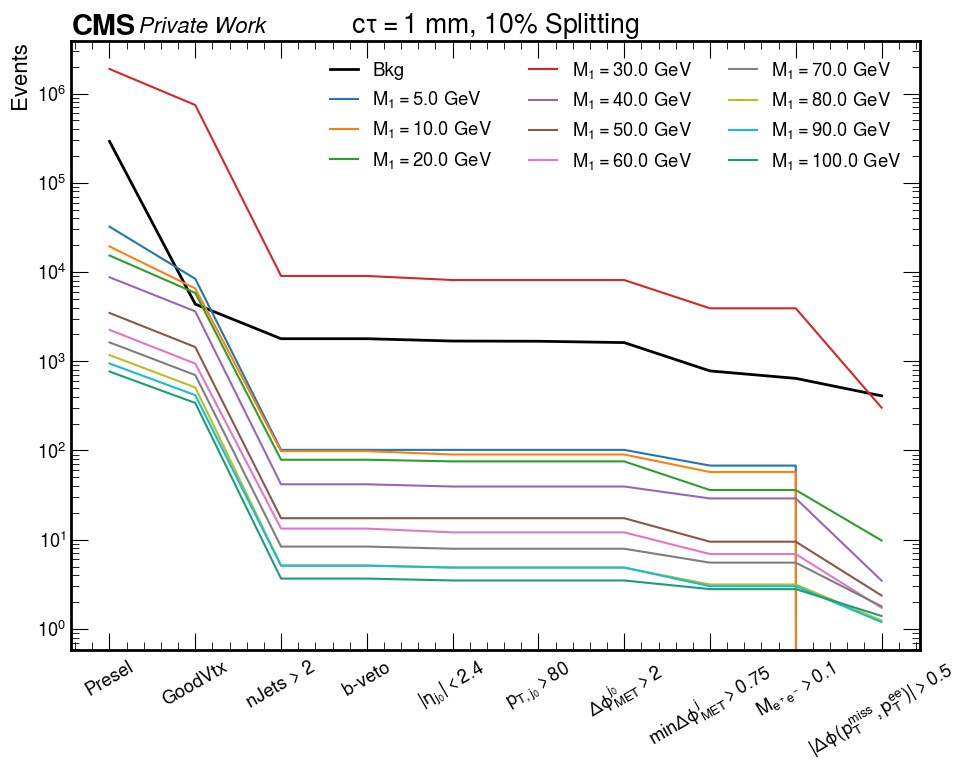

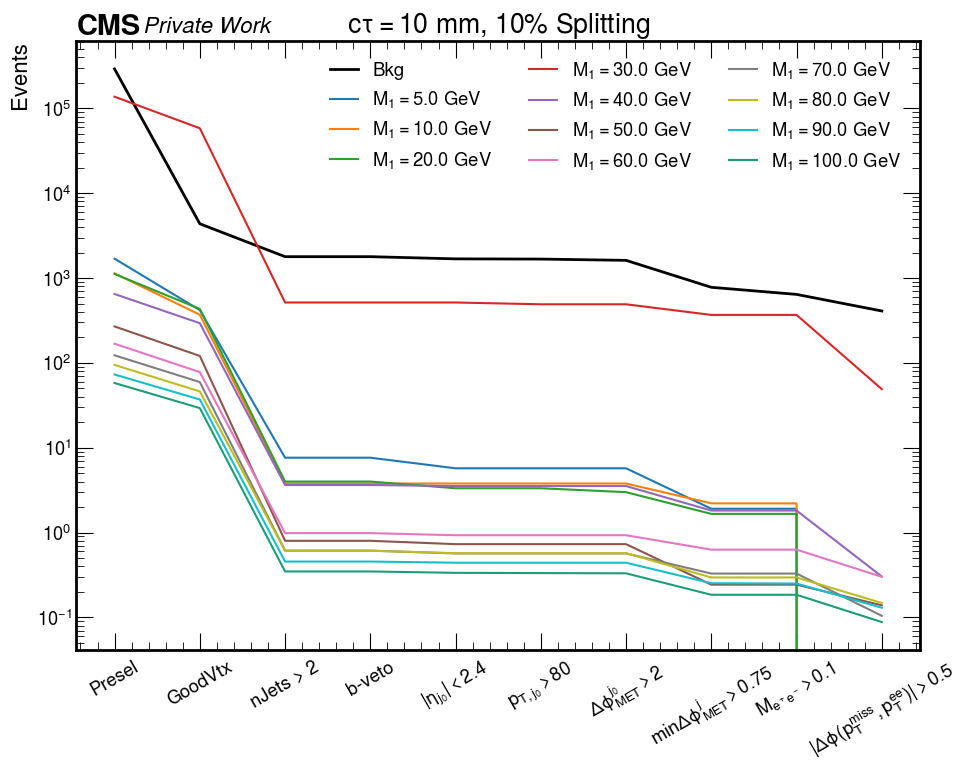

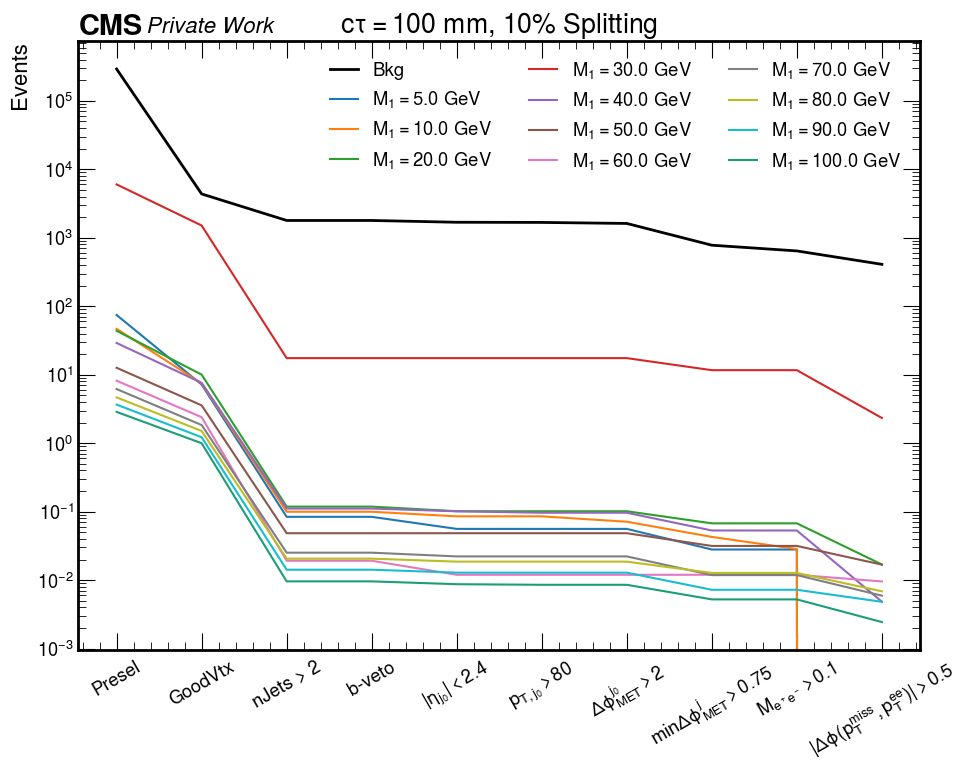

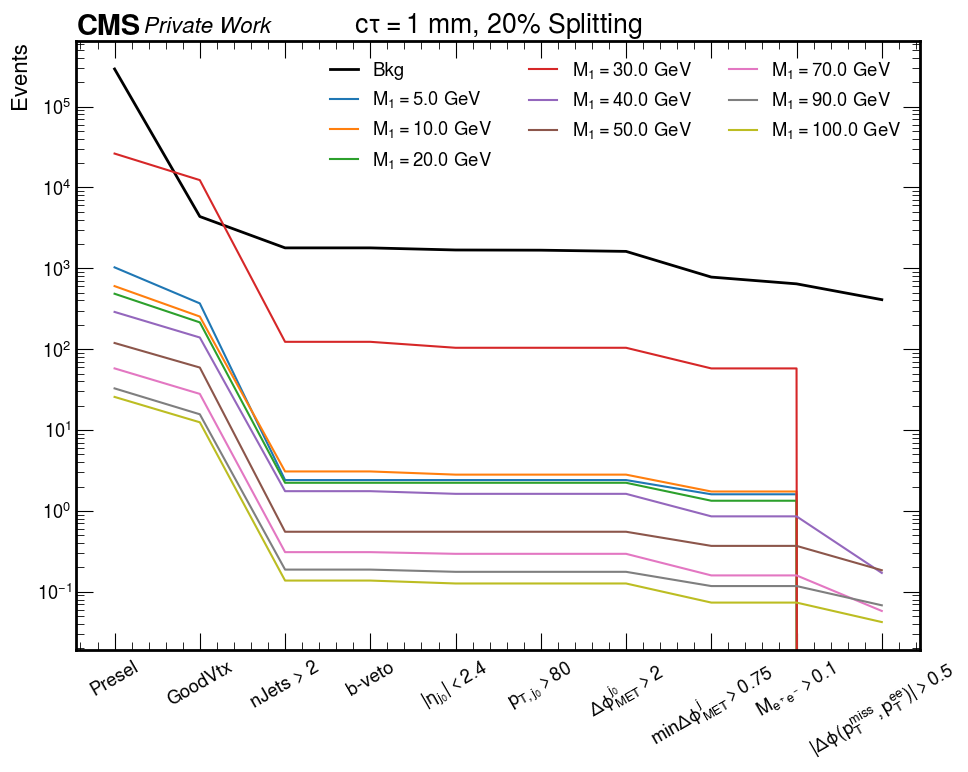

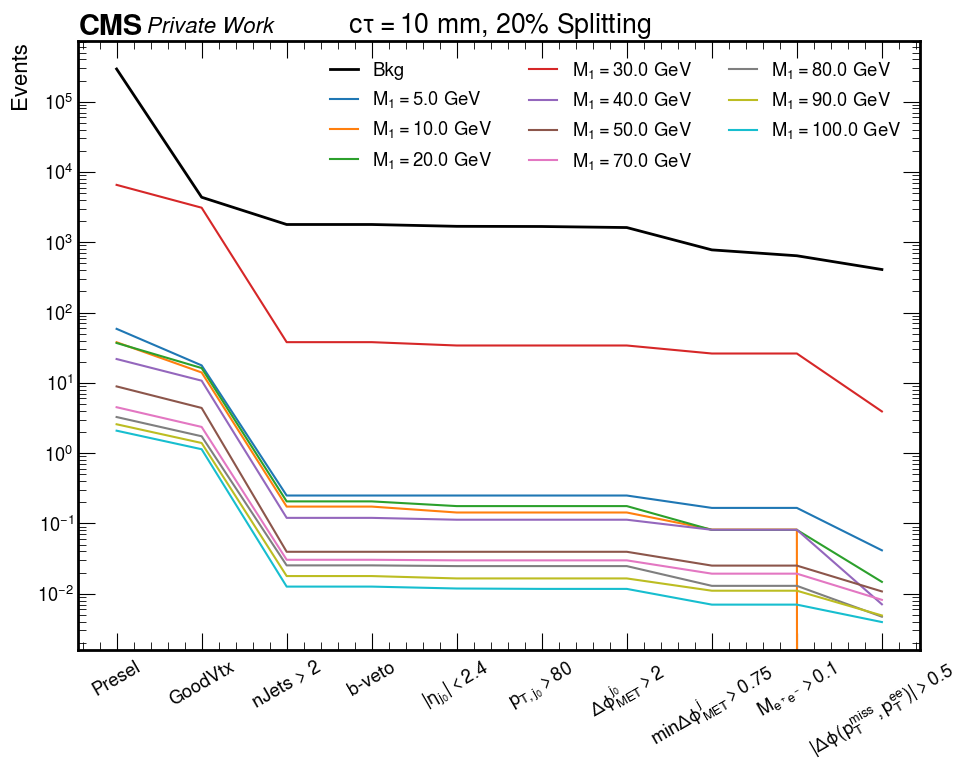

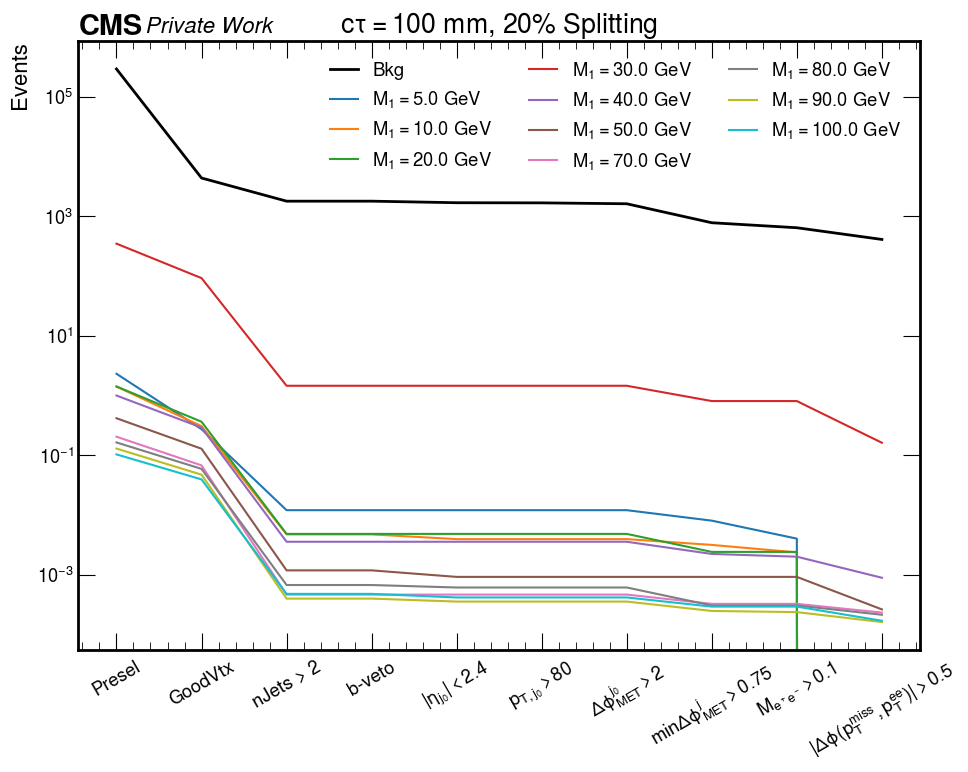

In [39]:
from matplotlib import colormaps
ctaus = [1,10,100]
deltas = [0.1,0.2]
for d in deltas:
    dfc = dfs[dfs.delta==d]
    for ct in ctaus:
        dfc2 = dfc[dfc.ctau==ct]
        m1s = sorted(list(set(dfc2.m1)))
        plt.figure(figsize=(10,8))
        bkg_line = [sum([cfb[b][cut] for b in cfb.keys()]) for cut in cuts]
        sig_cfLines = []
        for m1 in m1s:
            dfc3 = dfc2[dfc2.m1==m1]
            name = dfc3.name[0]
            sig_cf = cfs[name]
            line = []
            for cut in cuts:
                line.append(sig_cf[cut])
            sig_cfLines.append(line)
        plt.plot(np.arange(len(cuts)),bkg_line,lw=2,color='k',label="Bkg")
        for i,m1 in enumerate(m1s):
            plt.plot(np.arange(len(cuts)),sig_cfLines[i],color=cmap[i],label=rf"$M_1 = {m1}$ GeV")
        plt.xticks(np.arange(len(cuts)),labels=descs,rotation=30)
        plt.yscale('log')
        plt.title(rf"$c\tau = {int(ct)}$ mm, {int(100*d)}% Splitting")
        plt.ylabel("Events")
        #plt.ylim([None,1e6])
        plt.legend(loc='upper right',ncol=3)
        hep.cms.text("Private Work")
        plt.tight_layout()
        plt.savefig(f"plots_vtx_v8_VR/cutflow/cutflow_VR_delta{int(10*d)}_ct{ct}.pdf")

# Plots

In [16]:
cuts = ['cut7']
cutDesc = hcs.load('cutDesc')

/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


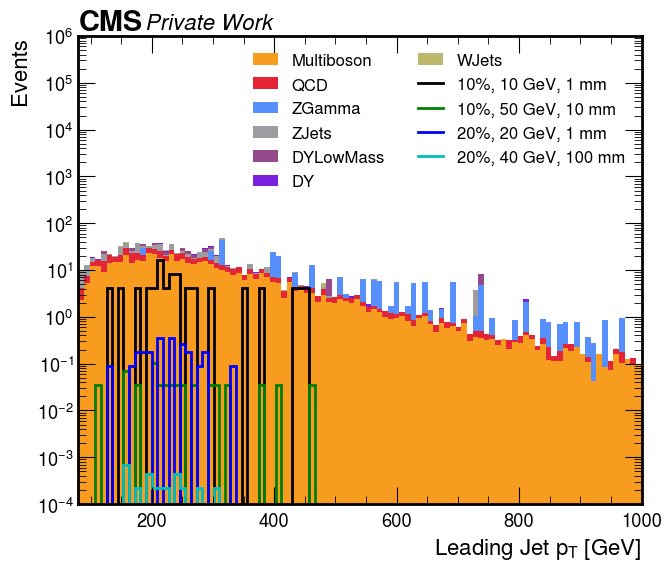

In [11]:
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_vtx_v8_VR/observables/{CUT}/"
    outName = "lead_jet_pt_selectedSignals"+f"_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"Leading Jet $p_T$ [GeV]"
    title = None
    hname = "lead_jet_pt"
    xlim = [80,1000]
    ylim = [1e-4,1e6]
    ptools.plot_samples_sigBkg(hcs,hcb,hname,selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),xlim=xlim,ylim=ylim,ncol_leg=2,xlabel=xlabel,rebin=1j,
                        save=False,show=True,logy=True,density=False,title=title,histtype='step',yerr=False)

/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


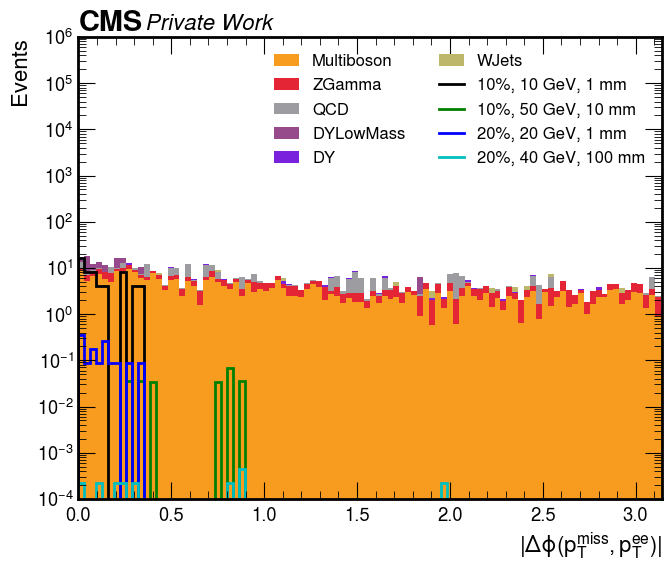

In [18]:
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_vtx_v8_VR/observables/{CUT}/"
    outName = "sel_vtx_METdPhi_selectedSignals"+f"_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"$|\Delta\phi(p_T^\mathrm{miss},p_T^{ee})|$"
    title = None
    hname = "sel_vtx_METdPhi"
    xlim = [0,np.pi]
    ylim = [1e-4,1e6]
    ptools.plot_samples_sigBkg(hcs,hcb,hname,selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),xlim=xlim,ylim=ylim,ncol_leg=2,xlabel=xlabel,rebin=1j,
                        save=False,show=True,logy=True,density=False,title=title,histtype='step',yerr=False)